## LECTURE 8: EDA(Exploratory Data Analysis)

## course: Awfera Machine Learning

## Instructor: Dr. Shazia Saqib

## Student: Muhammad Shafiq

____________

 > # Exploratory Data Analysis

**EDA (Exploratory Data Analysis)** is the process of exploring and understanding data before modeling. It involves using **statistics** and **visualizations** to find patterns, detect outliers, and check assumptions. Tools like pandas, seaborn, and matplotlib are commonly used. It helps in data cleaning, feature selection, and building better models. In short, EDA gives you a solid grasp of your dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

warnings.simplefilter(action='ignore', category=FutureWarning)

# import the Data

- **PassengerId**
→ Har passenger ka unique ID number (useless for prediction)

- **Survived**
→ Target variable: 1 = survived, 0 = died

- **Pclass**
→ Passenger class: 1st (luxury), 2nd, 3rd (economy) – proxy for wealth

- **Name**
→ Full name of passenger (contains title info like Mr., Miss., etc.)

- **Sex**
→ Gender: Male or Female (very important for survival)

- **Age**
→ Passenger’s age in years (may contain missing values)

- **SibSp**
→ Number of siblings/spouses onboard with the passenger

- **Parch**
→ Number of parents/children onboard

- **Ticket**
→ Ticket number (can be used for grouping/family detection)

- **Fare**
→ Amount paid for the ticket (correlates with class)

- **Cabin**
→ Cabin number (many missing, can show deck location)

- **Embarked**
→ Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton



In [6]:
import pandas as pd
# import the dataset
file_path = './dataset/tested.csv'
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# datatypes of feature
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                      

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Seaborn Functionality
- **Seaborn** automatically handles aesthetics (colors, labels, grids).

- Seaborn has ready-to-use plots for:
distributions, boxplots, violinplots, regression plots, etc.
Matplotlib only gives basic chart types (bar, line, scatter), not statistical insights.

- Seaborn directly accepts column names from Pandas DataFrame.
Matplotlib needs x = df['column'] type manual input.

- Seaborn charts look visually appealing out of the box.
Matplotlib graphs need styling (gridlines, font sizes, colors).

- Seaborn automatically generates axis titles and legends.
In Matplotlib, everything needs to be set manually.

- Seaborn has dedicated plots for categorical data:
countplot, boxplot, barplot, catplot, etc.
Matplotlib doesn’t differentiate categorical vs numerical.

- Seaborn offers facet-based plots (e.g., FacetGrid, catplot, pairplot)
Matplotlib needs complex subplots setup manually.

- Seaborn includes professional color palettes (deep, muted, pastel, etc.) Matplotlib requires manual color selection.

- Seaborn shows confidence intervals, regression lines, and distribution estimates by default.
Matplotlib doesn’t have statistical overlays.

- Seaborn enables complex visual analysis with 1-line functions.
Matplotlib often needs multiple lines for same output.

In [7]:
df.shape

(418, 12)

# Simple Graphs

**Survival Rate by Passenger Class**

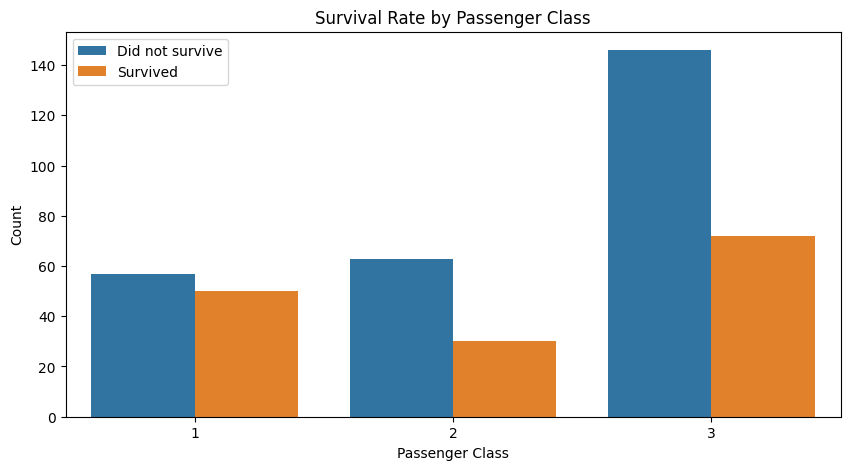

In [8]:
# create figure and axis
plt.Figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(labels=['Did not survive', 'Survived'])
plt.show()

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


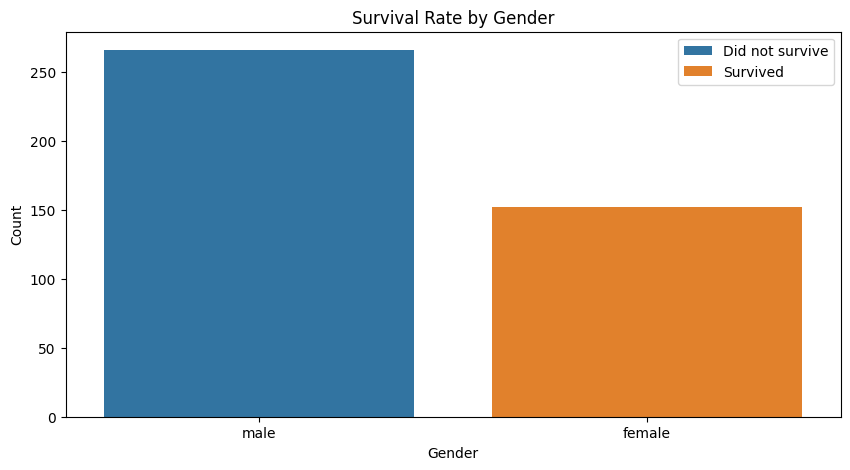

In [10]:
# Survival Rate by Gender
plt.Figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(labels=['Did not survive', 'Survived'])
plt.show()

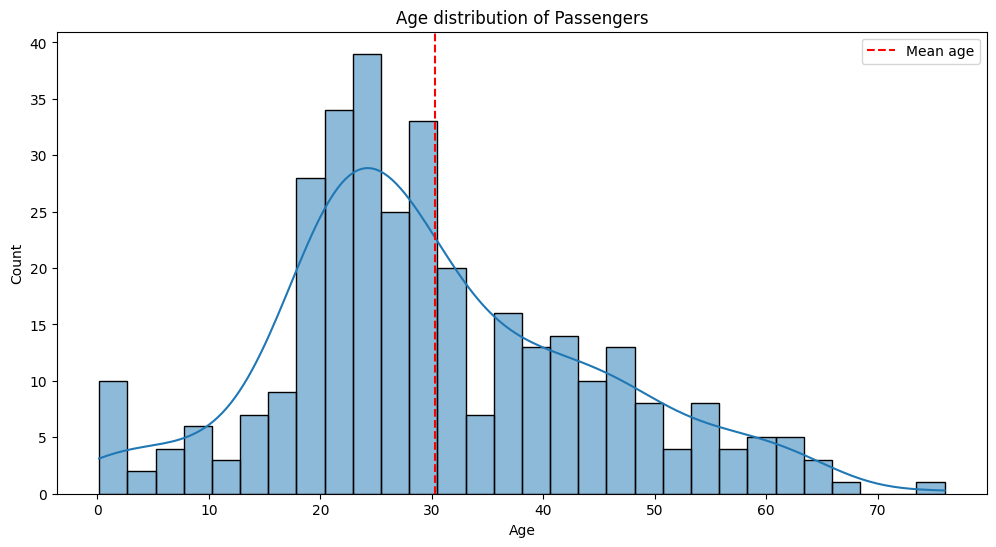

In [12]:
# Age distribution of Passengers
plt.figure(figsize=[12,6])
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.axvline(df['Age'].mean(), color='red',linestyle='--', label='Mean age')
plt.legend()
plt.show()

# 2. Distribution plots

Distribution of data is the formost thing that we need to understand while analysing the data. Here, we will se how seabotn helps us in inderstanding the distribution of our data.

2.1. distplot:

The distplot() function provides the most convenient way to take a quic look at univariate distributio .This function will plot a histogram that fits the **kernel desity estimation(KDE)** of the data.

Now let's plot the histogram of **Number of Parent and childern of the passenger abord(parch).**

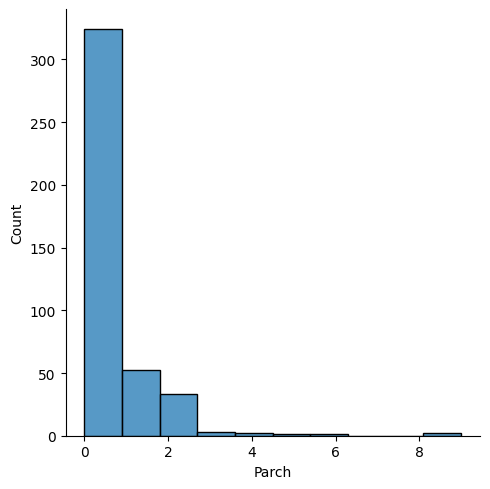

In [13]:
sns.displot(df['Parch'], kde =False)
plt.show()

## 2.2. kdeplot

Kernel Density Estimation(KDE)  is a way to estimate the probablity density function of a continuous random variable. It is use non-parametric analysis. Setting the hist flag to flase in distplot will yeild the KDE plot. For bivarite distribution, we can plot a kde by using jointplot(). Pass value 'kde' to the parameter king to plot kernel plot 

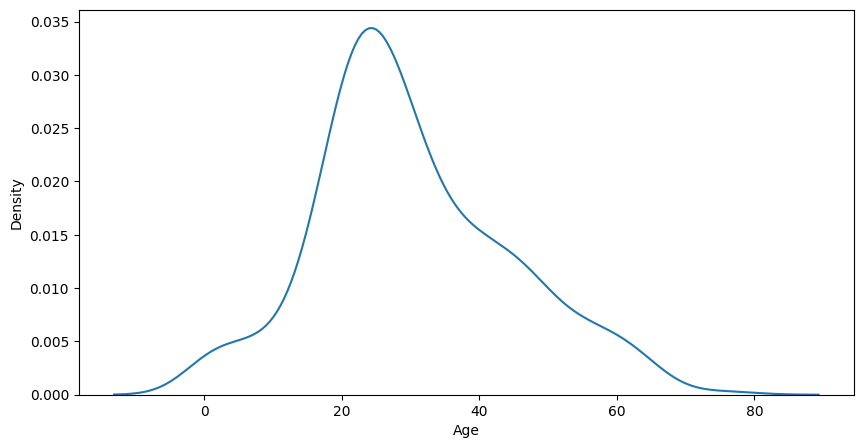

In [14]:
sns.distplot(df['Age'], hist=False)
plt.show()

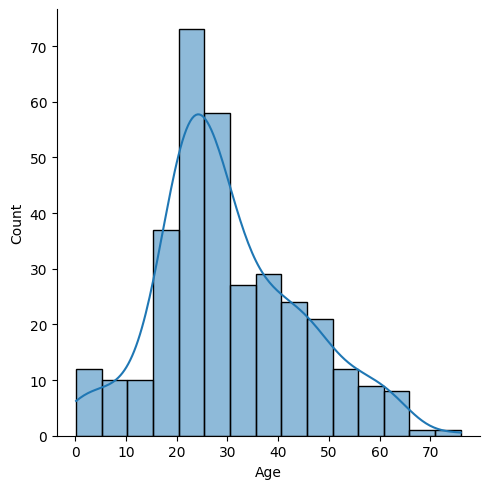

In [16]:
plt.Figure(figsize=(8,8))
sns.displot(df['Age'], kde=True)
plt.show()

# 3. Relational plots

## 3.1 relplot

Figure-level interface for drawing relational plots into a facetGrid

The function relplot() is named that way because it is designed to visualize many differnet statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter to let you easily switch to this alternate representation. 


<Figure size 1500x1500 with 0 Axes>

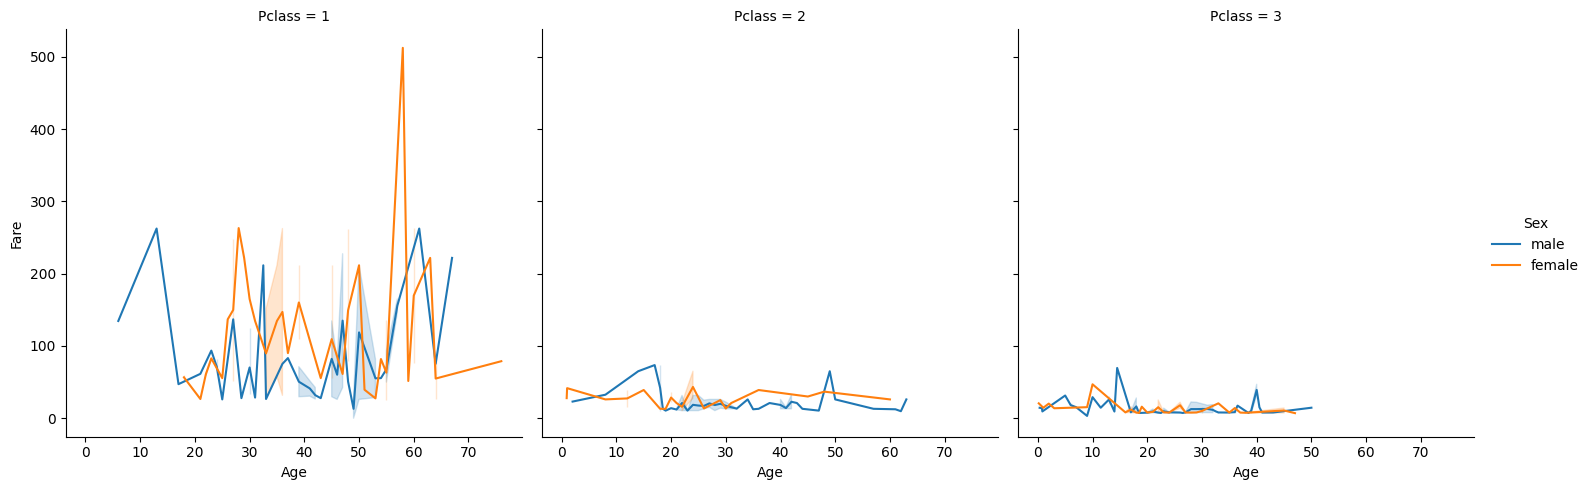

In [20]:
plt.figure(figsize=[15,15])
sns.relplot(x='Age', y='Fare', col='Pclass', hue='Sex', kind='line', data=df)
plt.show()

## 3.2 scatterplot

Scatter plot is the most convenient way to visulaize the distribution where each observation is represented in two-dimensional plot via x and y axis.


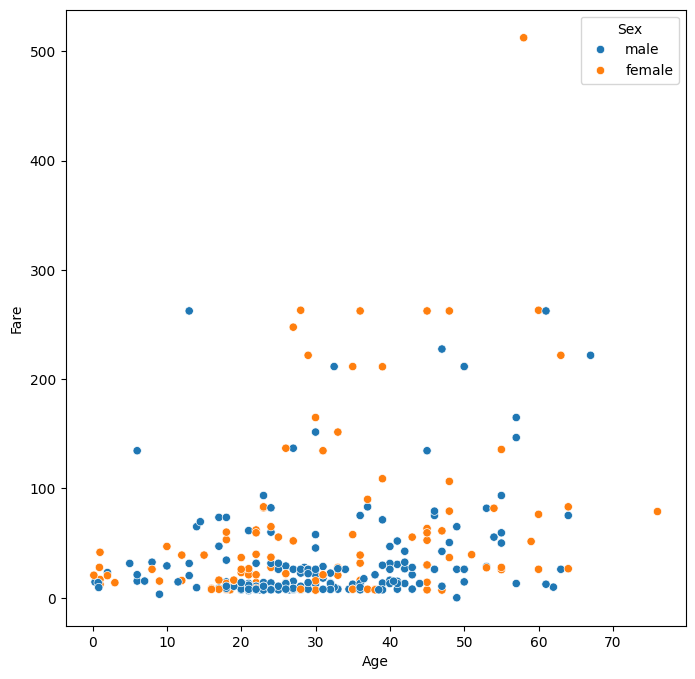

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=df)
plt.show()

# 3.3  Lineplot

A **line plot** is used to visualize the relationship between two continuous variables by connecting data points with a line, helping reveal trends, patterns, or fluctuations. It’s ideal for showing how one variable (e.g., survival rate) changes in relation to another ordered variable (e.g., age or time). In EDA, it highlights continuous progression, making it useful for time series, grouped averages, or trend comparisons. Seaborn’s lineplot handles grouping with hue, making it easy to compare multiple series within a single plot.

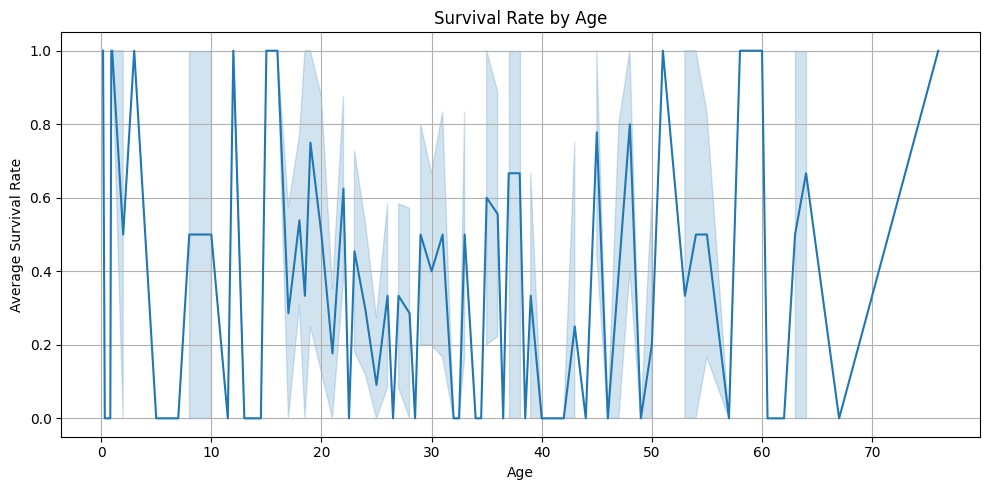

In [29]:
# lineplot for survival rate by age
sns.lineplot(data=df, x='Age', y='Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel("Average Survival Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Catagorical graph

## countplot: 

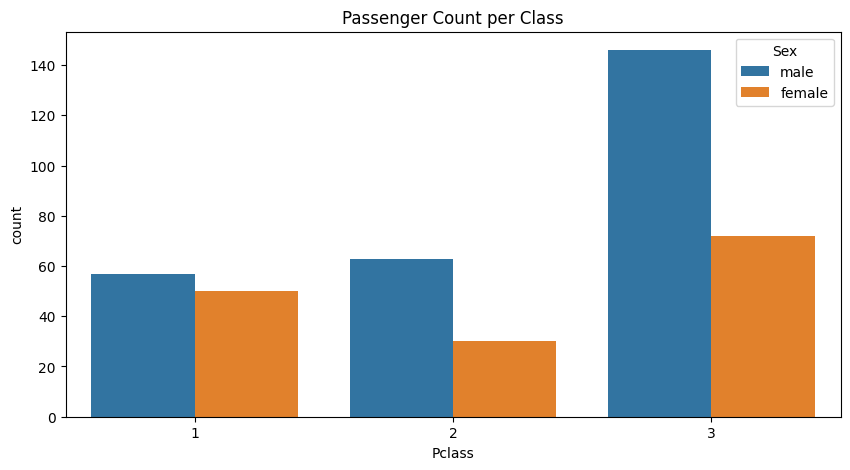

In [31]:
sns.countplot(data=df, x='Pclass', hue='Sex')
plt.title('Passenger Count per Class')
plt.show()

## barplot: 


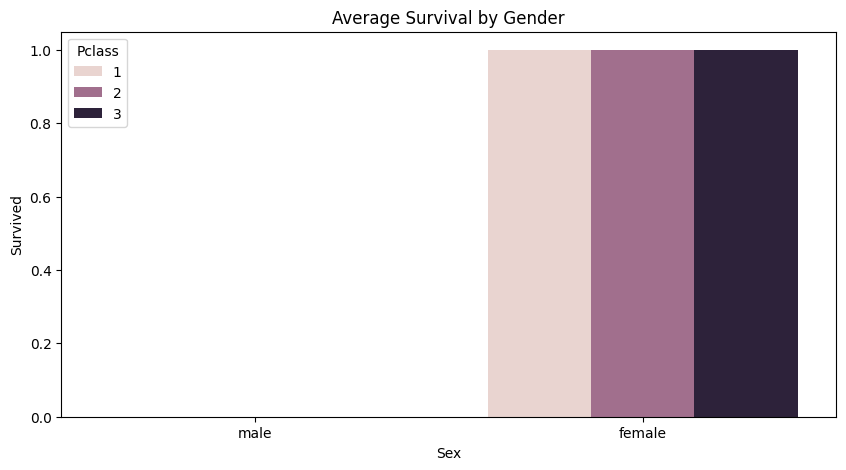

In [36]:
sns.barplot(data=df, x='Sex', y='Survived', hue='Pclass')
plt.title("Average Survival by Gender")
plt.show()

## boxplot: 

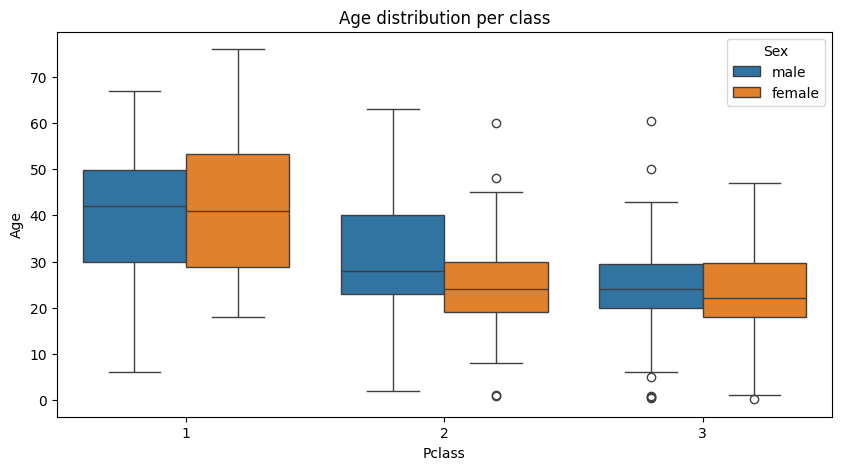

In [38]:
sns.boxplot(data=df, x='Pclass', y='Age', hue="Sex")
plt.title('Age distribution per class')
plt.show()

## Voilinplot 

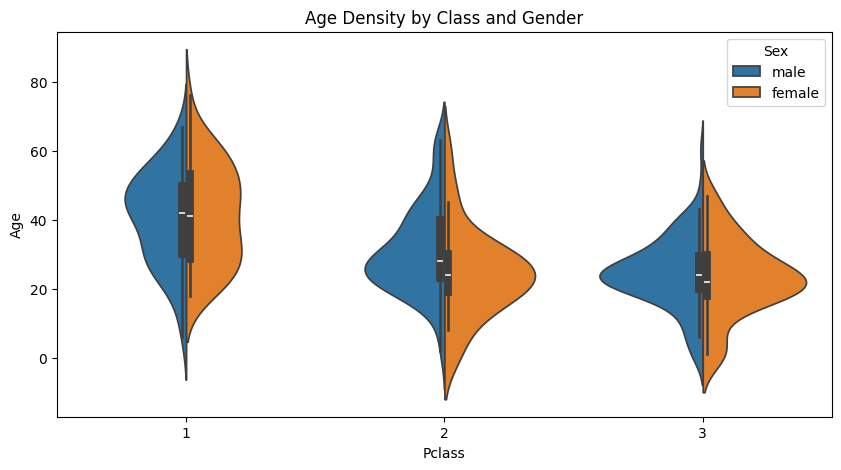

In [39]:
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True)
plt.title("Age Density by Class and Gender")
plt.show()

## stripplot

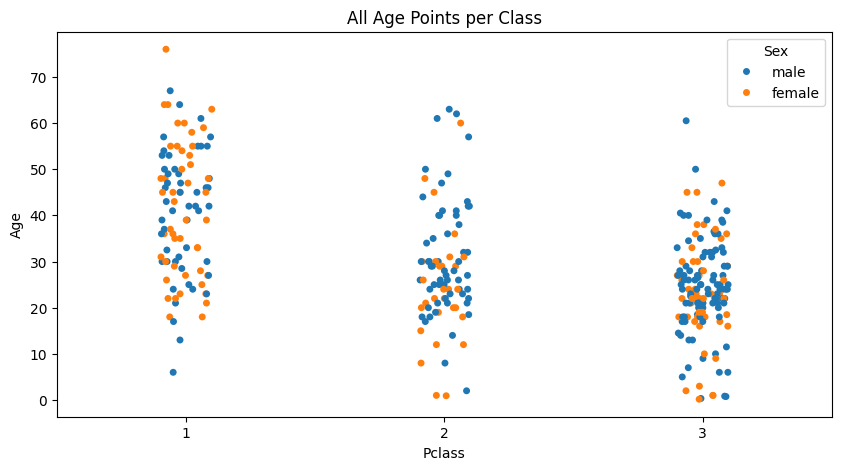

In [41]:
sns.stripplot(data=df, x='Pclass', y='Age',hue='Sex', jitter=True)
plt.title('All Age Points per Class')
plt.show()


## swarmplot

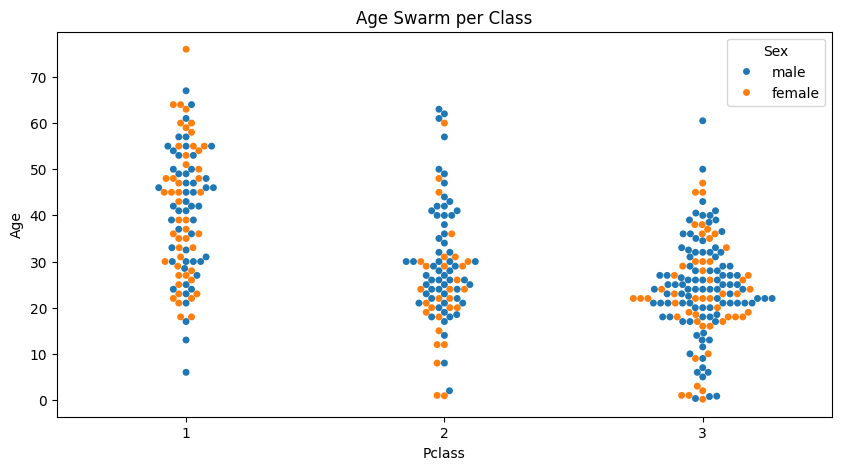

In [44]:
sns.swarmplot(data=df, x='Pclass',hue='Sex', y='Age')
plt.title('Age Swarm per Class')
plt.show()


## Catplot

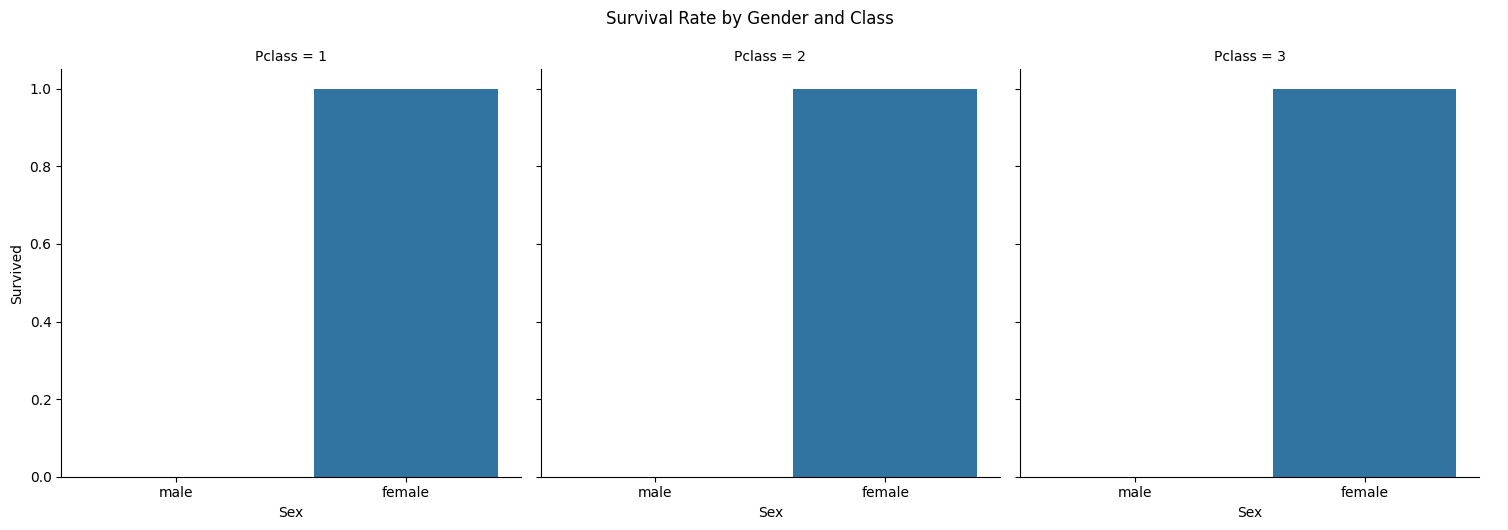

In [47]:
sns.catplot(data=df, x='Sex', y='Survived', kind='bar', col='Pclass')
plt.suptitle('Survival Rate by Gender and Class', y=1.05)
plt.show()
